# Supervised Learning: Support Vector Machines

## Multiclass: Reduction: to Binary Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

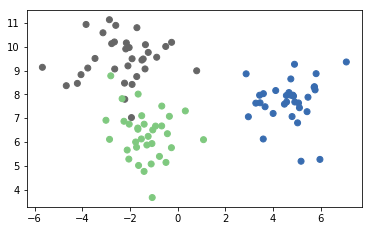

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
ax = plt.gca()
ax.set_aspect("equal")

In [3]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)

* reducing the problem of multi-class classification into several instances of the binary classification problem

# 1. One Vs Rest

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=100).fit(X, y)

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 1. One Vs Rest: sklearn.svm.LinearSVC(): Lines

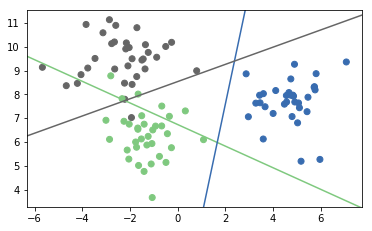

In [5]:
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)

plt.gca().set_aspect("equal")
plt.xlim(xlim)
plt.ylim(ylim)

plt.savefig("images/ovr_lines.png")

## 1. One Vs Rest: sklearn.svm.LinearSVC(): Boundaries

In [6]:
# predict, which classifer has highest response?
pred = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])

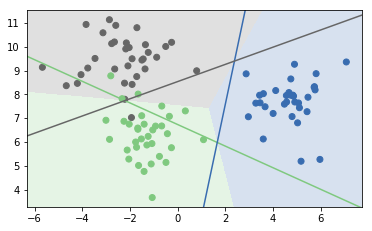

In [7]:
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
    
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")

plt.savefig("images/ovr_boundaries.png")

* One vs Rest is the default for sklearn linear models, except for SVC():

# 2. One Vs One: sklearn.svm.SVC()

In [8]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=100).fit(X, y)

# binary classifer for each pair of classes, 
# i.e. n_classes * (n_classes-1) * 0.5 binary classifiers
# i.e. utilise only a fraction of the data (i.e. balanced subsets)

## 2. One Vs One: sklearn.svm.SVC():  Lines

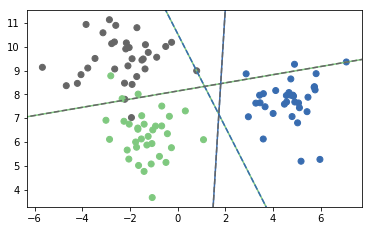

In [9]:
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
classes = [(0, 1), (0, 2), (1, 2)]

for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])

plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")

plt.savefig("images/ovo_lines.png")

# each boundary line is for a pair of classes, 
# each line did not use one classification

## 2. One Vs One: sklearn.svm.SVC():  Boundaries

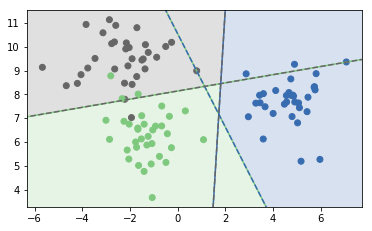

In [10]:
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))

for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])

plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")

plt.savefig("images/ovo_boundaries.png")

# shade areas based on the votes that each classifier gives
# the centre is a mix of all three, but the algorithm here picks the first classification.

Use: LinearSVC  
* One versus Rest
* squared hinge loss
* provide faster results 

Don't use: SVC(kernel='linear')
* One versus One
* hinged loss